In [1]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import clean_fifa_functions as clean_data
import clean_test_data_functions as clean_data_test
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('fifa21_train.csv')
data = clean_data.clean_fifa_test_data(data)

In [3]:
data.shape

(11413, 60)

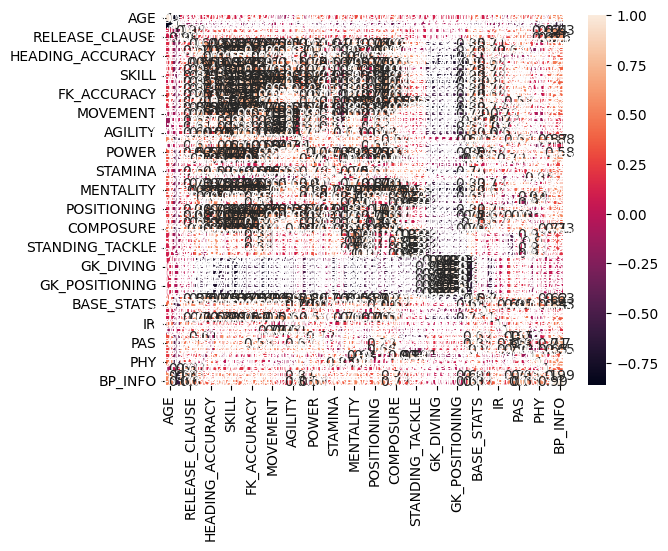

In [4]:
numerical = data.select_dtypes(include=np.number)
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [5]:
data.shape

(11413, 60)

In [6]:
data

,AGE,NATIONALITY,CLUB,GROWTH,VALUE,RELEASE_CLAUSE,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,HITS,OVA,BP_INFO
0,26,Switzerland,FC Lausanne-Sport,1,0.525,0.801,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3.0,64,63
1,30,China PR,Beijing Sinobo Guoan FC,0,8.500,0.000,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44.0,77,77
2,33,Italy,Al Hilal,0,9.000,15.300,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73.0,80,80
3,22,Wales,Swansea City,13,0.275,0.694,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7.0,59,58
4,23,France,US Orléans Loiret Football,8,0.725,1.400,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4.0,65,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,0,0.550,1.200,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,3,3,1,66,68,47,66,33,57,4.0,65,65
11696,25,Iceland,Jagiellonia Białystok,5,0.625,0.891,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3,2,1,75,28,56,59,60,69,3.0,65,63
11697,27,France,ESTAC Troyes,4,1.600,2.900,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,2,1,1,72,67,66,72,40,70,3.0,70,69
11698,22,Chile,CD Antofagasta,8,1.100,1.700,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,3,3,1,76,60,60,72,26,43,6.0,67,66


In [7]:
numerical = data.select_dtypes(include=np.number)
numerical['OVA'] = data['OVA']

# Calculate correlations matrix
correlations_matrix = numerical.corr()
# Get correlations with 'OVA' column
correlations_with_OVA = correlations_matrix['OVA'].drop('OVA')
print(len(correlations_with_OVA))
columns_under_threshold = correlations_with_OVA[correlations_with_OVA.abs() < 0.8].index.to_list()
print(len(columns_under_threshold))
columns_under_threshold

data.drop(columns=columns_under_threshold,inplace=True)


57
54


In [8]:
numerical = data.select_dtypes(include=np.number)
numerical['OVA'] = data['OVA']

# Calculate correlations matrix
correlations_matrix = numerical.corr()
# Get correlations with 'OVA' column
correlations_with_OVA = correlations_matrix['OVA'].drop('OVA')
correlations_with_OVA

REACTIONS     0.873014
BASE_STATS    0.837879
BP_INFO       0.989541
Name: OVA, dtype: float64

In [9]:
data.shape

(11413, 6)

In [10]:
data.head()

,NATIONALITY,CLUB,REACTIONS,BASE_STATS,OVA,BP_INFO
0,Switzerland,FC Lausanne-Sport,66,357,64,63
1,China PR,Beijing Sinobo Guoan FC,75,412,77,77
2,Italy,Al Hilal,78,404,80,80
3,Wales,Swansea City,55,329,59,58
4,France,US Orléans Loiret Football,62,360,65,64


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
REACTIONS,11413.0,62.815912,9.050208,24.0,57.0,63.0,69.0,96.0
BASE_STATS,11413.0,360.937878,40.488741,228.0,332.0,362.0,389.0,490.0
OVA,11413.0,66.869535,6.909793,38.0,62.0,67.0,72.0,93.0
BP_INFO,11413.0,66.451240,6.845896,38.0,62.0,66.0,71.0,92.0


In [12]:
data['NATIONALITY'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Switzerland
1           China PR
2              Italy
3              Wales
4             France
            ...     
11695           Peru
11696        Iceland
11697         France
11698          Chile
11700      Argentina
Name: NATIONALITY, Length: 11413, dtype: object>

---------------------------------------------------


In [13]:
data.reset_index(drop=True, inplace=True)
data.drop(columns=['NATIONALITY'], inplace=True)
# setting y (target) as OVA
y = data['OVA']
# set X to all columns, minus the target
X = data.drop(['OVA'], axis=1)

X_cat = data.select_dtypes(include=object)
X_numerical= X.select_dtypes(include = np.number)

In [14]:

labels_categorical= pd.DataFrame()

for column in X_cat:
    encoded_label = LabelEncoder().fit_transform(X_cat[column])
    labels_categorical[column] = encoded_label

X_cat = labels_categorical
print(X_cat.head(4))
#print(X_cat['NATIONALITY'].max())
print(X_cat['CLUB'].max())

   CLUB
0   309
1   101
2    42
3   767
881


SPLIT

In [15]:
#X = pd.concat([X_numerical, X_cat], axis=1)
X = X_numerical

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9130, 3)
(2283, 3)
(9130,)
(2283,)


In [17]:
# train/fit model 
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)
predictions_test = lm.predict(X_test)

In [18]:
print("R2-score is ", lm.score(X,y))
print("MSE is ", mean_squared_error(y_test,predictions_test))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test,predictions_test)))
print("MAE-score is ", mean_absolute_error(y_test, predictions_test))

R2-score is  0.9799794440543432
MSE is  1.0930697567294971
RMSE-score is  1.0454997640982504
MAE-score is  0.7560588779273244


       REACTIONS  BASE_STATS  BP_INFO  OVA
0             66         357       63   64
1             75         412       77   77
2             78         404       80   80
3             55         329       58   59
4             62         360       64   65
...          ...         ...      ...  ...
11408         71         337       65   65
11409         53         347       63   65
11410         65         387       69   70
11411         62         337       66   67
11412         61         336       65   64

[11413 rows x 4 columns]


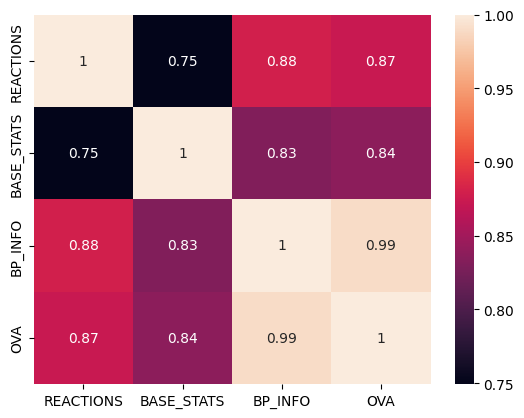

In [19]:
numerical = data.select_dtypes(include=np.number)
numerical = data[['REACTIONS','BASE_STATS','BP_INFO','OVA']]
print(numerical)
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [20]:
# from sklearn.linear_model import LinearRegression
# X = data.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
# Y = data.iloc[:, 4].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
# linear_regressor = LinearRegression()
# linear_regressor.fit(X, Y)
# Y_pred = linear_regressor.predict(X)

# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.show()